In [33]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from matplotlib import pyplot as plt
import numpy as np
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print('Current cuda device is', device)

batch_size = 50
learning_rate = 0.0001
epoch_num = 15

train_data = datasets.MNIST(root = '../data/mnist/',
                            train=True,
                            download=True,
                            transform=transforms.ToTensor())
test_data = datasets.MNIST(root = '../data/mnist/',
                            train=False,
                            download=True,
                            transform=transforms.ToTensor())
print('number of training data : ', len(train_data))
print('number of test data : ', len(test_data))


Current cuda device is cuda
number of training data :  60000
number of test data :  10000


In [34]:
images = train_data.data
labels = train_data.targets


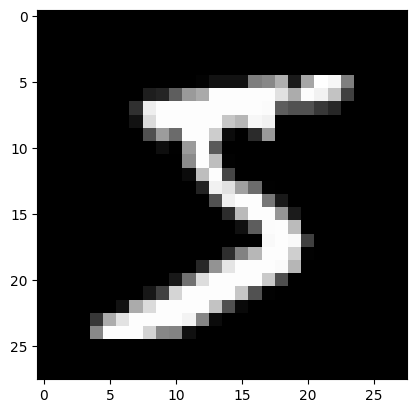

In [36]:
plt.imshow(images[0],cmap='gray')

In [28]:
train = images.reshape(-1, 28*28).float()
[n,m] = train.shape

(-0.5, 19.5, 0.5, -0.5)

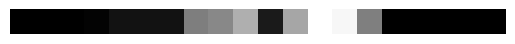

In [51]:
imgxx = train[0][149:169].reshape(1,20)
plt.imshow(imgxx.reshape(1,20),cmap='gray')
# no grid
plt.grid(False)
# no value on axis
plt.axis('off')

In [20]:
numTrain =7000
train = train[0:numTrain]
labels = labels[0:numTrain]
train.shape,labels.shape

(torch.Size([2000, 784]), torch.Size([2000]))

In [21]:
# data normalization
train = train/255.0
mean = torch.mean(train,0)
train_norm = train - mean


In [22]:
# PCA : calculate the covariance matrix
xtx = torch.matmul(train.t(),train)
xtx = xtx/(numTrain-1) # why ? n-1?
xtx.shape

torch.Size([784, 784])

(-0.5, 5567.5, 3711.5, -0.5)

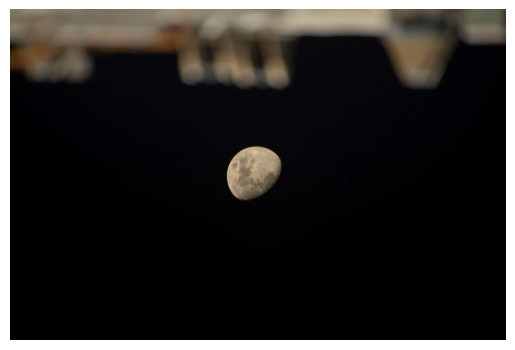

In [13]:
import cv2
import matplotlib.pyplot as plt
image = cv2.imread('./moon.jpg')
# convert to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#show image
plt.imshow(image)#, cmap='gray')
# no axis
plt.axis('off')


(-0.5, 5567.5, 3711.5, -0.5)

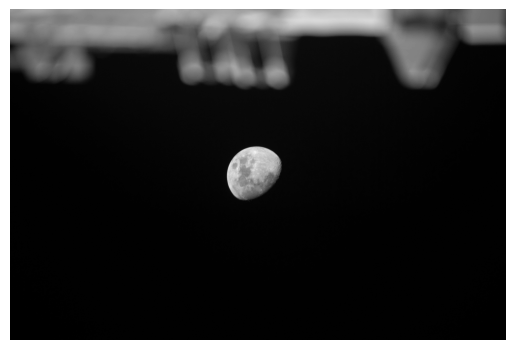

In [6]:
import cv2
import matplotlib.pyplot as plt
image = cv2.imread('./moon.jpg')
# chagne to gray scale
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#show image
plt.imshow(image, cmap='gray')
# no axis
plt.axis('off')


(204, 216, 3)
(4, 4, 3)


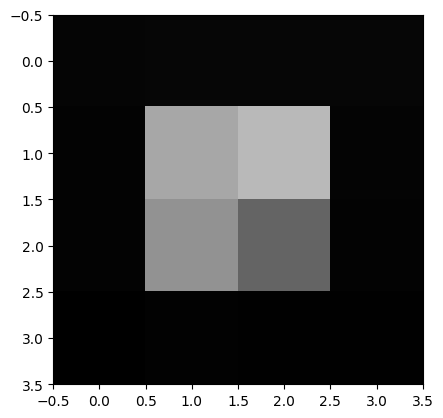

In [24]:
# resize the image 
image = cv2.imread('./1.png')
print(image.shape)
image = cv2.resize(image, (4,4))
print(image.shape)
plt.imshow(image)

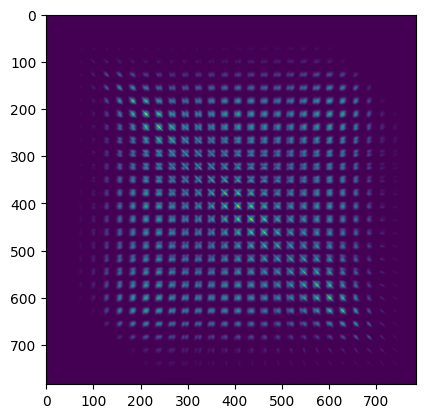

In [67]:
# show matrix as image
plt.imshow(xtx)

In [23]:
# eigenvalue decomposition
L,V = torch.linalg.eig(xtx)

In [69]:
L.shape,V.shape # lambda, eigenvector

(torch.Size([784]), torch.Size([784, 784]))

In [70]:
type(V[0][0])
V[0][0].dtype,xtx[0][0].dtype

(torch.complex64, torch.float32)

In [24]:
# change floast to complex
xtx_c = xtx.type(torch.complex64)

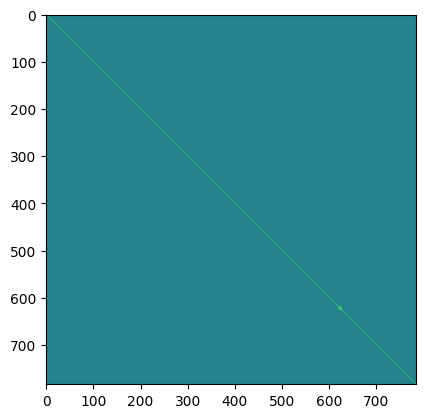

In [27]:
I = V.T@V
plt.imshow(I.real)


In [28]:
L@

tensor([ 3.8706e+01+0.0000e+00j,  4.3998e+00+0.0000e+00j,
         3.8515e+00+0.0000e+00j,  3.2790e+00+0.0000e+00j,
         2.8154e+00+0.0000e+00j,  2.3774e+00+0.0000e+00j,
         1.8859e+00+0.0000e+00j,  1.5807e+00+0.0000e+00j,
         1.5042e+00+0.0000e+00j,  1.1880e+00+0.0000e+00j,
         1.0899e+00+0.0000e+00j,  1.0330e+00+0.0000e+00j,
         9.0410e-01+0.0000e+00j,  8.5634e-01+0.0000e+00j,
         8.3206e-01+0.0000e+00j,  7.8382e-01+0.0000e+00j,
         6.8539e-01+0.0000e+00j,  6.3606e-01+0.0000e+00j,
         6.2671e-01+0.0000e+00j,  6.0323e-01+0.0000e+00j,
         5.6880e-01+0.0000e+00j,  5.1349e-01+0.0000e+00j,
         4.9366e-01+0.0000e+00j,  4.7133e-01+0.0000e+00j,
         4.6048e-01+0.0000e+00j,  4.4363e-01+0.0000e+00j,
         4.0884e-01+0.0000e+00j,  3.9656e-01+0.0000e+00j,
         3.7773e-01+0.0000e+00j,  3.5959e-01+0.0000e+00j,
         3.4035e-01+0.0000e+00j,  3.1997e-01+0.0000e+00j,
         3.1047e-01+0.0000e+00j,  2.8932e-01+0.0000e+00j,
         2.852

In [41]:
I = V.T@xtx_c@V 
idn = I.conj().T@I

In [47]:
# V@V.T = I

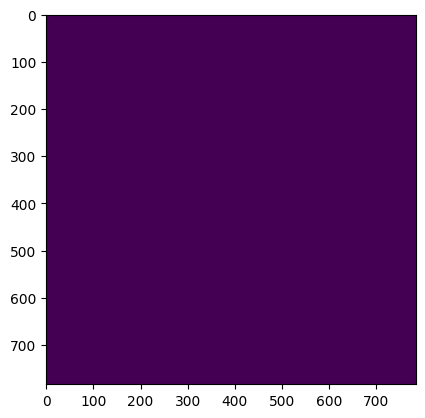

In [72]:
D = V.T@xtx_c@V
plt.imshow(D.real)

In [44]:
idn

tensor([[ 2.5313e+19+0.j, -9.3202e+11+0.j, -1.6430e+12+0.j,  ...,
          0.0000e+00+0.j,  0.0000e+00+0.j,  0.0000e+00+0.j],
        [-9.3202e+11+0.j,  3.2707e+17+0.j,  4.5062e+11+0.j,  ...,
          0.0000e+00+0.j,  0.0000e+00+0.j,  0.0000e+00+0.j],
        [-1.6430e+12+0.j,  4.5062e+11+0.j,  2.5063e+17+0.j,  ...,
          0.0000e+00+0.j,  0.0000e+00+0.j,  0.0000e+00+0.j],
        ...,
        [ 0.0000e+00+0.j,  0.0000e+00+0.j,  0.0000e+00+0.j,  ...,
          0.0000e+00+0.j,  0.0000e+00+0.j,  0.0000e+00+0.j],
        [ 0.0000e+00+0.j,  0.0000e+00+0.j,  0.0000e+00+0.j,  ...,
          0.0000e+00+0.j,  0.0000e+00+0.j,  0.0000e+00+0.j],
        [ 0.0000e+00+0.j,  0.0000e+00+0.j,  0.0000e+00+0.j,  ...,
          0.0000e+00+0.j,  0.0000e+00+0.j,  0.0000e+00+0.j]])

In [75]:
# evac , eval = eig(M)

total = sum(map(lambda x: x.real, L))

In [73]:
# xtx_c@V[:,0] - L[0]*V[:,0]

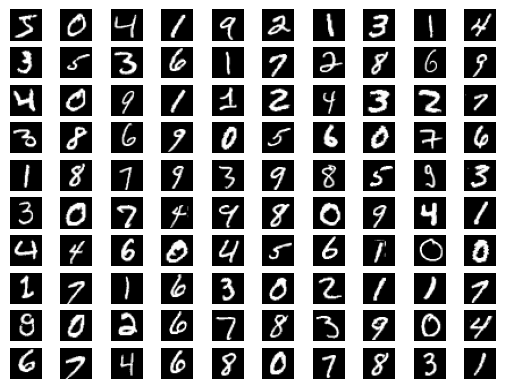

<Figure size 3000x3000 with 0 Axes>

In [13]:
import matplotlib.pyplot as plt

n = 10
images = []
for i in range(n ** 2):
    image, label = train_data[i]
    image = image.squeeze().numpy()
    images.append(image)

# Create a figure with 5 rows and 5 columns
fig, axes = plt.subplots(nrows=n, ncols=n)
plt.figure(figsize=(30, 30))

# Display each image in a separate subplot
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i], cmap='gray')
    ax.axis('off')

# Show the figure
plt.show()


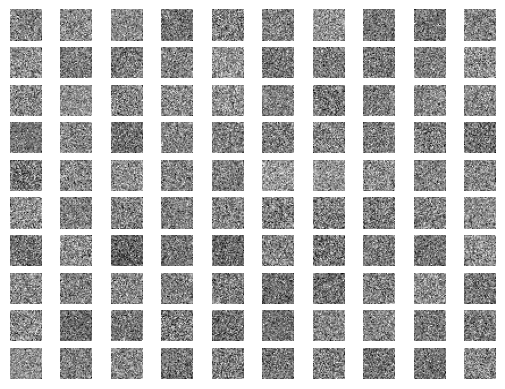

<Figure size 3000x3000 with 0 Axes>

In [12]:
fig, axes = plt.subplots(nrows=n, ncols=n)
plt.figure(figsize=(30, 30))

# Display each image in a separate subplot
for i, ax in enumerate(axes.flat):
    ax.imshow(np.random.randn(28, 28),cmap='gray')
    ax.axis('off')

# Show the figure
plt.show()


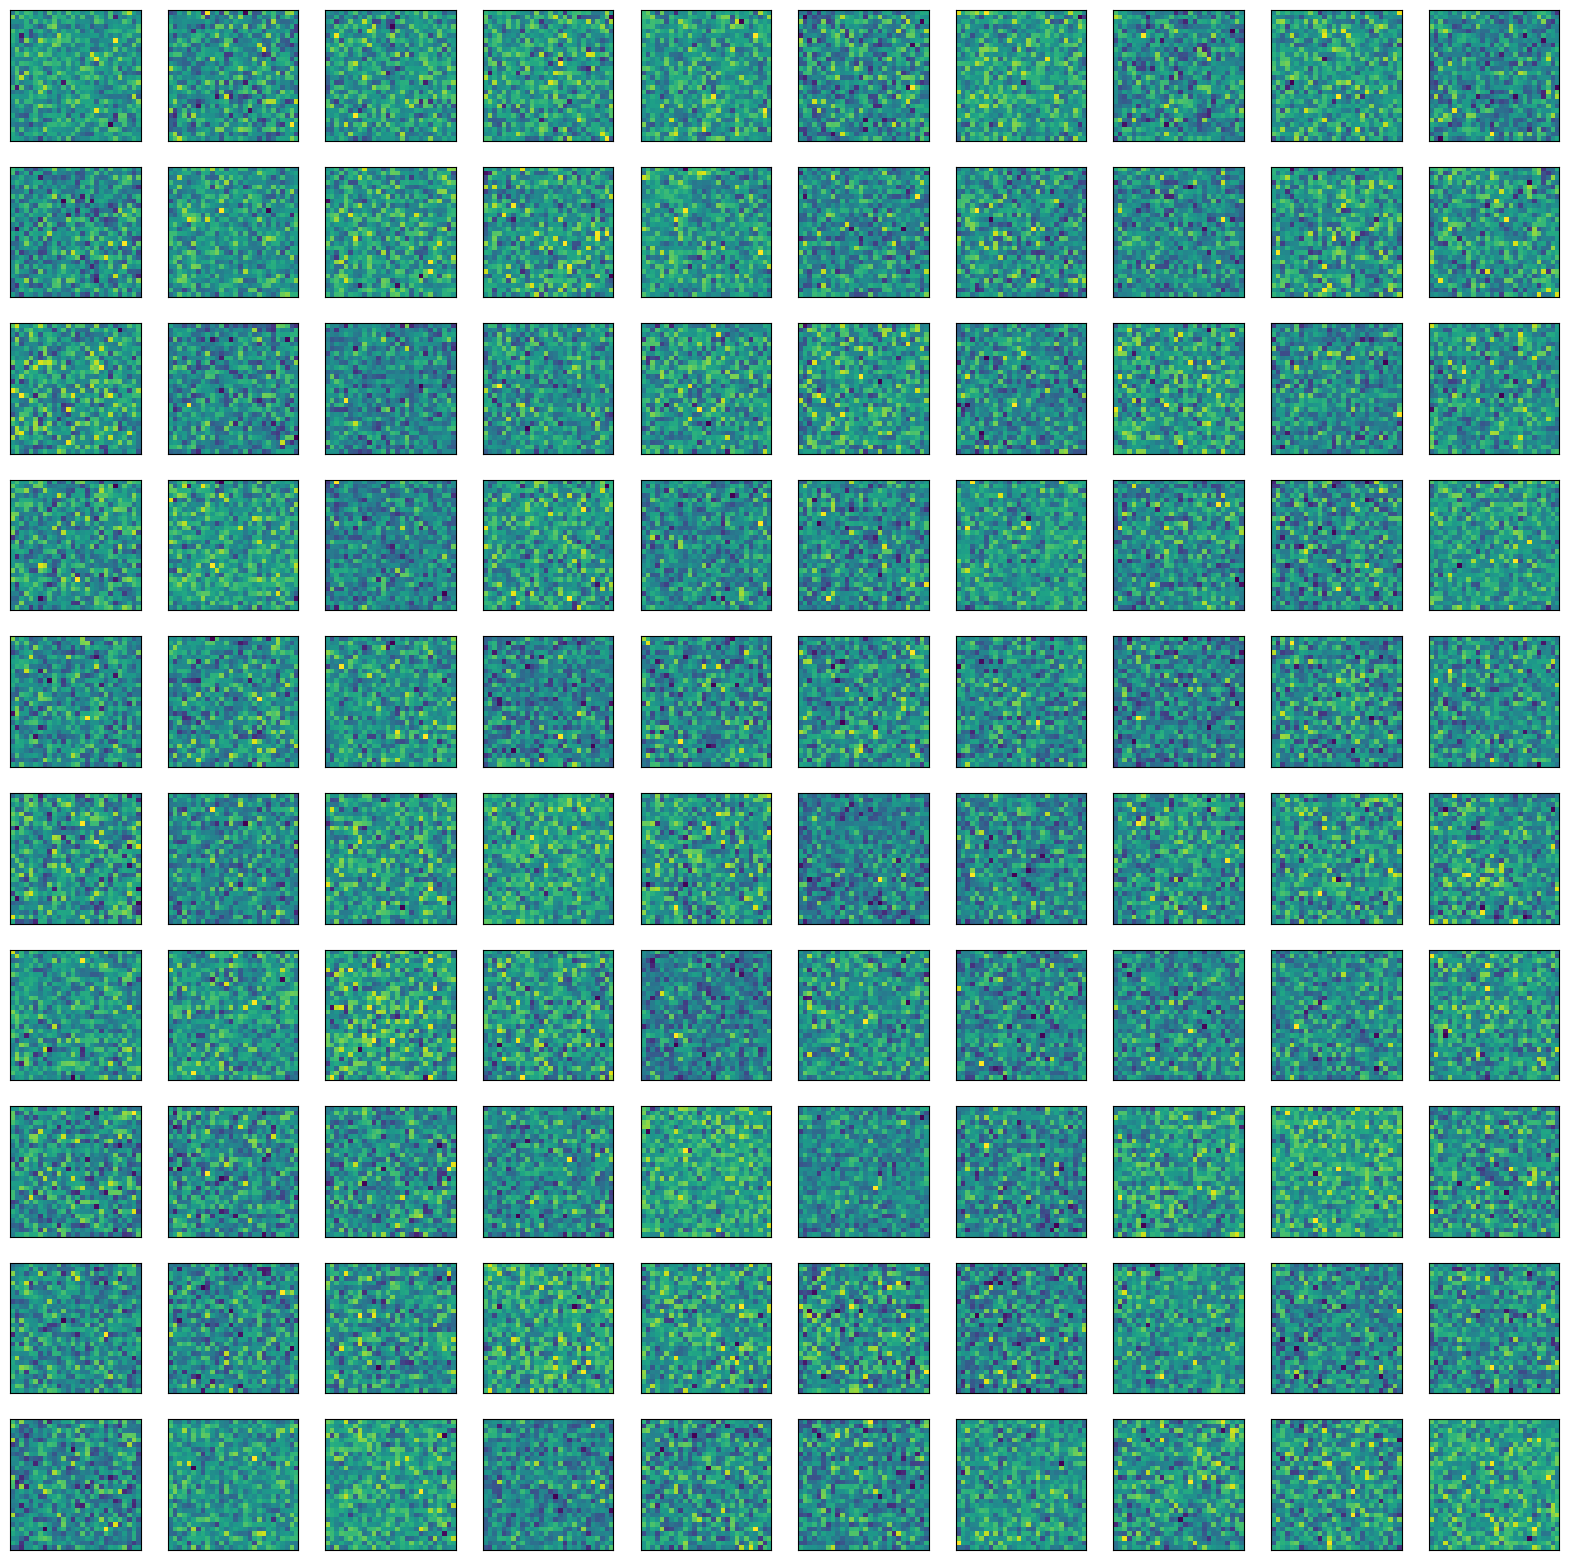

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 20))
for i in range(n**2):
    
    image = np.random.randn(28, 28)
    plt.subplot(n, n, i+1 )
    plt.imshow(image)
    # no ticks
    plt.xticks([])
    plt.yticks([])
plt.show()